## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.2ms	remaining: 47.1s
1:	learn: 0.9582303	total: 48ms	remaining: 23.9s
2:	learn: 0.9353695	total: 48.8ms	remaining: 16.2s
3:	learn: 0.9161608	total: 49.6ms	remaining: 12.4s
4:	learn: 0.8990488	total: 50.5ms	remaining: 10.1s
5:	learn: 0.8832373	total: 51.3ms	remaining: 8.5s
6:	learn: 0.8650817	total: 52.1ms	remaining: 7.39s
7:	learn: 0.8477194	total: 53.1ms	remaining: 6.58s
8:	learn: 0.8311338	total: 53.8ms	remaining: 5.93s
9:	learn: 0.8132347	total: 54.6ms	remaining: 5.41s
10:	learn: 0.7953546	total: 55.4ms	remaining: 4.98s
11:	learn: 0.7796915	total: 56.2ms	remaining: 4.63s
12:	learn: 0.7641617	total: 57ms	remaining: 4.33s
13:	learn: 0.7484061	total: 57.8ms	remaining: 4.07s
14:	learn: 0.7353909	total: 58.6ms	remaining: 3.85s
15:	learn: 0.7199546	total: 59.5ms	remaining: 3.66s
16:	learn: 0.7058790	total: 60.5ms	remaining: 3.5s
17:	learn: 0.6928959	total: 61.3ms	remaining: 3.34s
18:	learn: 0.6802797	total: 62.3ms	remaining: 3.22s
19:	learn: 0.6666222	total: 

106:	learn: 0.2890244	total: 135ms	remaining: 1.13s
107:	learn: 0.2877824	total: 136ms	remaining: 1.12s
108:	learn: 0.2866076	total: 137ms	remaining: 1.12s
109:	learn: 0.2859470	total: 138ms	remaining: 1.11s
110:	learn: 0.2847736	total: 138ms	remaining: 1.11s
111:	learn: 0.2837297	total: 139ms	remaining: 1.1s
112:	learn: 0.2825964	total: 140ms	remaining: 1.1s
113:	learn: 0.2811402	total: 141ms	remaining: 1.09s
114:	learn: 0.2797104	total: 142ms	remaining: 1.09s
115:	learn: 0.2785930	total: 143ms	remaining: 1.09s
116:	learn: 0.2773867	total: 143ms	remaining: 1.08s
117:	learn: 0.2762157	total: 144ms	remaining: 1.08s
118:	learn: 0.2751476	total: 145ms	remaining: 1.07s
119:	learn: 0.2742685	total: 146ms	remaining: 1.07s
120:	learn: 0.2732505	total: 147ms	remaining: 1.07s
121:	learn: 0.2722779	total: 148ms	remaining: 1.06s
122:	learn: 0.2706818	total: 148ms	remaining: 1.06s
123:	learn: 0.2699505	total: 149ms	remaining: 1.05s
124:	learn: 0.2691699	total: 150ms	remaining: 1.05s
125:	learn: 0.

165:	learn: 0.2366878	total: 185ms	remaining: 928ms
166:	learn: 0.2363036	total: 186ms	remaining: 926ms
167:	learn: 0.2355500	total: 187ms	remaining: 924ms
168:	learn: 0.2349215	total: 187ms	remaining: 921ms
169:	learn: 0.2341849	total: 188ms	remaining: 919ms
170:	learn: 0.2335247	total: 189ms	remaining: 916ms
171:	learn: 0.2330065	total: 190ms	remaining: 915ms
172:	learn: 0.2326195	total: 191ms	remaining: 912ms
173:	learn: 0.2319223	total: 192ms	remaining: 909ms
174:	learn: 0.2313989	total: 192ms	remaining: 907ms
175:	learn: 0.2306230	total: 193ms	remaining: 904ms
176:	learn: 0.2299509	total: 194ms	remaining: 902ms
177:	learn: 0.2293964	total: 195ms	remaining: 900ms
178:	learn: 0.2288240	total: 196ms	remaining: 897ms
179:	learn: 0.2283193	total: 196ms	remaining: 895ms
180:	learn: 0.2276200	total: 197ms	remaining: 893ms
181:	learn: 0.2270094	total: 198ms	remaining: 890ms
182:	learn: 0.2265258	total: 199ms	remaining: 889ms
183:	learn: 0.2260137	total: 200ms	remaining: 886ms
184:	learn: 

268:	learn: 0.1845694	total: 274ms	remaining: 745ms
269:	learn: 0.1840414	total: 275ms	remaining: 744ms
270:	learn: 0.1836199	total: 276ms	remaining: 743ms
271:	learn: 0.1832198	total: 277ms	remaining: 741ms
272:	learn: 0.1826792	total: 278ms	remaining: 739ms
273:	learn: 0.1824564	total: 278ms	remaining: 738ms
274:	learn: 0.1820491	total: 279ms	remaining: 736ms
275:	learn: 0.1816464	total: 280ms	remaining: 735ms
276:	learn: 0.1813464	total: 281ms	remaining: 733ms
277:	learn: 0.1810632	total: 282ms	remaining: 732ms
278:	learn: 0.1808467	total: 282ms	remaining: 730ms
279:	learn: 0.1804819	total: 283ms	remaining: 728ms
280:	learn: 0.1800651	total: 284ms	remaining: 727ms
281:	learn: 0.1796570	total: 285ms	remaining: 726ms
282:	learn: 0.1792465	total: 286ms	remaining: 724ms
283:	learn: 0.1789390	total: 287ms	remaining: 723ms
284:	learn: 0.1785633	total: 288ms	remaining: 722ms
285:	learn: 0.1781925	total: 289ms	remaining: 720ms
286:	learn: 0.1777819	total: 289ms	remaining: 719ms
287:	learn: 

328:	learn: 0.1635890	total: 324ms	remaining: 661ms
329:	learn: 0.1632923	total: 325ms	remaining: 660ms
330:	learn: 0.1629712	total: 326ms	remaining: 659ms
331:	learn: 0.1624494	total: 327ms	remaining: 657ms
332:	learn: 0.1620981	total: 328ms	remaining: 656ms
333:	learn: 0.1618328	total: 328ms	remaining: 655ms
334:	learn: 0.1614792	total: 329ms	remaining: 654ms
335:	learn: 0.1611670	total: 330ms	remaining: 652ms
336:	learn: 0.1607130	total: 331ms	remaining: 651ms
337:	learn: 0.1604204	total: 332ms	remaining: 650ms
338:	learn: 0.1601258	total: 332ms	remaining: 648ms
339:	learn: 0.1598547	total: 333ms	remaining: 647ms
340:	learn: 0.1595338	total: 334ms	remaining: 646ms
341:	learn: 0.1591560	total: 335ms	remaining: 644ms
342:	learn: 0.1588241	total: 336ms	remaining: 643ms
343:	learn: 0.1584322	total: 337ms	remaining: 642ms
344:	learn: 0.1581554	total: 337ms	remaining: 641ms
345:	learn: 0.1579230	total: 338ms	remaining: 639ms
346:	learn: 0.1576617	total: 339ms	remaining: 638ms
347:	learn: 

437:	learn: 0.1362182	total: 412ms	remaining: 529ms
438:	learn: 0.1360213	total: 413ms	remaining: 528ms
439:	learn: 0.1359071	total: 414ms	remaining: 527ms
440:	learn: 0.1356568	total: 415ms	remaining: 526ms
441:	learn: 0.1353241	total: 416ms	remaining: 525ms
442:	learn: 0.1351545	total: 417ms	remaining: 524ms
443:	learn: 0.1349249	total: 417ms	remaining: 523ms
444:	learn: 0.1346373	total: 418ms	remaining: 522ms
445:	learn: 0.1343300	total: 419ms	remaining: 520ms
446:	learn: 0.1339775	total: 420ms	remaining: 519ms
447:	learn: 0.1336963	total: 421ms	remaining: 518ms
448:	learn: 0.1334275	total: 421ms	remaining: 517ms
449:	learn: 0.1332987	total: 422ms	remaining: 516ms
450:	learn: 0.1331067	total: 423ms	remaining: 515ms
451:	learn: 0.1328279	total: 424ms	remaining: 514ms
452:	learn: 0.1325780	total: 425ms	remaining: 513ms
453:	learn: 0.1323446	total: 425ms	remaining: 512ms
454:	learn: 0.1320852	total: 426ms	remaining: 510ms
455:	learn: 0.1318339	total: 427ms	remaining: 509ms
456:	learn: 

495:	learn: 0.1238442	total: 463ms	remaining: 470ms
496:	learn: 0.1235879	total: 464ms	remaining: 469ms
497:	learn: 0.1234208	total: 465ms	remaining: 468ms
498:	learn: 0.1231217	total: 466ms	remaining: 467ms
499:	learn: 0.1229870	total: 466ms	remaining: 466ms
500:	learn: 0.1227567	total: 467ms	remaining: 465ms
501:	learn: 0.1226643	total: 468ms	remaining: 464ms
502:	learn: 0.1224801	total: 469ms	remaining: 463ms
503:	learn: 0.1223190	total: 470ms	remaining: 462ms
504:	learn: 0.1221077	total: 471ms	remaining: 461ms
505:	learn: 0.1219576	total: 472ms	remaining: 460ms
506:	learn: 0.1218548	total: 472ms	remaining: 459ms
507:	learn: 0.1216641	total: 473ms	remaining: 458ms
508:	learn: 0.1214343	total: 474ms	remaining: 457ms
509:	learn: 0.1212732	total: 475ms	remaining: 456ms
510:	learn: 0.1211052	total: 476ms	remaining: 455ms
511:	learn: 0.1208910	total: 477ms	remaining: 454ms
512:	learn: 0.1205847	total: 478ms	remaining: 453ms
513:	learn: 0.1204759	total: 478ms	remaining: 452ms
514:	learn: 

596:	learn: 0.1071407	total: 549ms	remaining: 371ms
597:	learn: 0.1070094	total: 551ms	remaining: 370ms
598:	learn: 0.1068378	total: 551ms	remaining: 369ms
599:	learn: 0.1067240	total: 552ms	remaining: 368ms
600:	learn: 0.1066308	total: 553ms	remaining: 367ms
601:	learn: 0.1064834	total: 554ms	remaining: 366ms
602:	learn: 0.1063183	total: 555ms	remaining: 365ms
603:	learn: 0.1061908	total: 556ms	remaining: 364ms
604:	learn: 0.1060025	total: 557ms	remaining: 363ms
605:	learn: 0.1058657	total: 557ms	remaining: 362ms
606:	learn: 0.1057348	total: 558ms	remaining: 361ms
607:	learn: 0.1056360	total: 559ms	remaining: 360ms
608:	learn: 0.1054397	total: 560ms	remaining: 359ms
609:	learn: 0.1052296	total: 561ms	remaining: 359ms
610:	learn: 0.1050978	total: 562ms	remaining: 358ms
611:	learn: 0.1049759	total: 562ms	remaining: 357ms
612:	learn: 0.1047950	total: 563ms	remaining: 356ms
613:	learn: 0.1046790	total: 564ms	remaining: 355ms
614:	learn: 0.1045934	total: 565ms	remaining: 354ms
615:	learn: 

655:	learn: 0.0984249	total: 600ms	remaining: 315ms
656:	learn: 0.0982410	total: 601ms	remaining: 314ms
657:	learn: 0.0980422	total: 602ms	remaining: 313ms
658:	learn: 0.0979537	total: 603ms	remaining: 312ms
659:	learn: 0.0978566	total: 603ms	remaining: 311ms
660:	learn: 0.0977789	total: 604ms	remaining: 310ms
661:	learn: 0.0975704	total: 605ms	remaining: 309ms
662:	learn: 0.0973971	total: 606ms	remaining: 308ms
663:	learn: 0.0972629	total: 607ms	remaining: 307ms
664:	learn: 0.0971872	total: 608ms	remaining: 306ms
665:	learn: 0.0969158	total: 609ms	remaining: 305ms
666:	learn: 0.0967571	total: 610ms	remaining: 304ms
667:	learn: 0.0966064	total: 610ms	remaining: 303ms
668:	learn: 0.0964459	total: 611ms	remaining: 302ms
669:	learn: 0.0963611	total: 612ms	remaining: 301ms
670:	learn: 0.0961664	total: 613ms	remaining: 300ms
671:	learn: 0.0959440	total: 614ms	remaining: 299ms
672:	learn: 0.0957466	total: 614ms	remaining: 299ms
673:	learn: 0.0956514	total: 615ms	remaining: 298ms
674:	learn: 

756:	learn: 0.0852547	total: 687ms	remaining: 220ms
757:	learn: 0.0851671	total: 688ms	remaining: 220ms
758:	learn: 0.0850702	total: 689ms	remaining: 219ms
759:	learn: 0.0849800	total: 689ms	remaining: 218ms
760:	learn: 0.0848933	total: 690ms	remaining: 217ms
761:	learn: 0.0846586	total: 691ms	remaining: 216ms
762:	learn: 0.0845349	total: 692ms	remaining: 215ms
763:	learn: 0.0844346	total: 693ms	remaining: 214ms
764:	learn: 0.0843622	total: 694ms	remaining: 213ms
765:	learn: 0.0842870	total: 694ms	remaining: 212ms
766:	learn: 0.0841950	total: 695ms	remaining: 211ms
767:	learn: 0.0841282	total: 696ms	remaining: 210ms
768:	learn: 0.0840619	total: 697ms	remaining: 209ms
769:	learn: 0.0839081	total: 698ms	remaining: 208ms
770:	learn: 0.0837202	total: 699ms	remaining: 208ms
771:	learn: 0.0835524	total: 699ms	remaining: 207ms
772:	learn: 0.0834207	total: 700ms	remaining: 206ms
773:	learn: 0.0833597	total: 701ms	remaining: 205ms
774:	learn: 0.0832641	total: 702ms	remaining: 204ms
775:	learn: 

816:	learn: 0.0793158	total: 738ms	remaining: 165ms
817:	learn: 0.0792219	total: 739ms	remaining: 164ms
818:	learn: 0.0790540	total: 739ms	remaining: 163ms
819:	learn: 0.0789521	total: 740ms	remaining: 163ms
820:	learn: 0.0788686	total: 741ms	remaining: 162ms
821:	learn: 0.0786589	total: 742ms	remaining: 161ms
822:	learn: 0.0785698	total: 743ms	remaining: 160ms
823:	learn: 0.0784177	total: 744ms	remaining: 159ms
824:	learn: 0.0782497	total: 745ms	remaining: 158ms
825:	learn: 0.0781281	total: 746ms	remaining: 157ms
826:	learn: 0.0780508	total: 747ms	remaining: 156ms
827:	learn: 0.0779554	total: 748ms	remaining: 155ms
828:	learn: 0.0779009	total: 749ms	remaining: 154ms
829:	learn: 0.0778063	total: 750ms	remaining: 154ms
830:	learn: 0.0776660	total: 750ms	remaining: 153ms
831:	learn: 0.0775915	total: 751ms	remaining: 152ms
832:	learn: 0.0774058	total: 752ms	remaining: 151ms
833:	learn: 0.0773394	total: 753ms	remaining: 150ms
834:	learn: 0.0772648	total: 754ms	remaining: 149ms
835:	learn: 

910:	learn: 0.0706051	total: 821ms	remaining: 80.2ms
911:	learn: 0.0704923	total: 822ms	remaining: 79.3ms
912:	learn: 0.0704330	total: 823ms	remaining: 78.4ms
913:	learn: 0.0703179	total: 824ms	remaining: 77.5ms
914:	learn: 0.0702500	total: 825ms	remaining: 76.6ms
915:	learn: 0.0702212	total: 826ms	remaining: 75.7ms
916:	learn: 0.0700883	total: 827ms	remaining: 74.8ms
917:	learn: 0.0699883	total: 827ms	remaining: 73.9ms
918:	learn: 0.0699332	total: 828ms	remaining: 73ms
919:	learn: 0.0698475	total: 829ms	remaining: 72.1ms
920:	learn: 0.0697426	total: 830ms	remaining: 71.2ms
921:	learn: 0.0696181	total: 831ms	remaining: 70.3ms
922:	learn: 0.0694964	total: 832ms	remaining: 69.4ms
923:	learn: 0.0694349	total: 833ms	remaining: 68.5ms
924:	learn: 0.0693576	total: 833ms	remaining: 67.6ms
925:	learn: 0.0692736	total: 834ms	remaining: 66.7ms
926:	learn: 0.0692230	total: 835ms	remaining: 65.8ms
927:	learn: 0.0690717	total: 836ms	remaining: 64.9ms
928:	learn: 0.0689558	total: 837ms	remaining: 64

968:	learn: 0.0653442	total: 871ms	remaining: 27.9ms
969:	learn: 0.0652869	total: 872ms	remaining: 27ms
970:	learn: 0.0652557	total: 873ms	remaining: 26.1ms
971:	learn: 0.0652081	total: 873ms	remaining: 25.2ms
972:	learn: 0.0651396	total: 874ms	remaining: 24.3ms
973:	learn: 0.0651023	total: 875ms	remaining: 23.4ms
974:	learn: 0.0650096	total: 876ms	remaining: 22.5ms
975:	learn: 0.0649243	total: 877ms	remaining: 21.6ms
976:	learn: 0.0647928	total: 878ms	remaining: 20.7ms
977:	learn: 0.0647539	total: 879ms	remaining: 19.8ms
978:	learn: 0.0646302	total: 879ms	remaining: 18.9ms
979:	learn: 0.0645675	total: 880ms	remaining: 18ms
980:	learn: 0.0644549	total: 881ms	remaining: 17.1ms
981:	learn: 0.0643118	total: 882ms	remaining: 16.2ms
982:	learn: 0.0642510	total: 883ms	remaining: 15.3ms
983:	learn: 0.0641533	total: 884ms	remaining: 14.4ms
984:	learn: 0.0641384	total: 884ms	remaining: 13.5ms
985:	learn: 0.0640055	total: 885ms	remaining: 12.6ms
986:	learn: 0.0639470	total: 886ms	remaining: 11.7

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

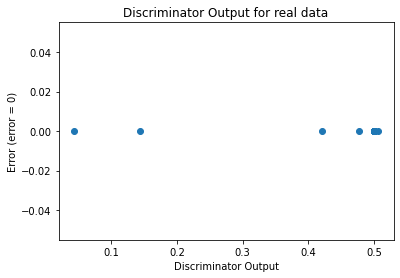

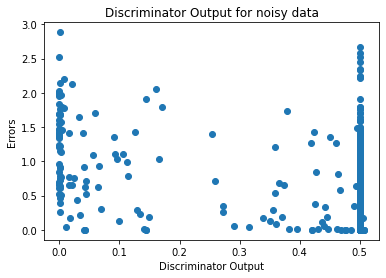

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

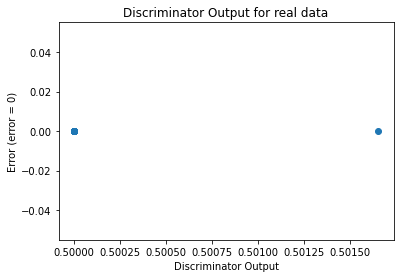

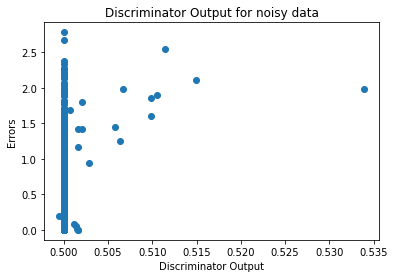

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0444]], device='cuda:0', requires_grad=True)
